## Лабораторная работа №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy
import statistics
import math
import random
%matplotlib inline

Первое и второе задание выполнены с оказательным распределеним с параметром 5:

$ \xi \sim \exp(5) $

# Задание 1
Закон больших чисел:

$ \xi_i $ - независимые одинаково распределенные случайные величины, 

$ S_n = \sum_{i=1}^n \xi_i $

Тогда при условии существования математического ожидания случайной величины выполняется:

$ \frac{S_n}{n} \to E\xi $

Text(0.5, 1.0, 'Гистограмма выборки рамером 3000 экспоненциальной случайной величины')

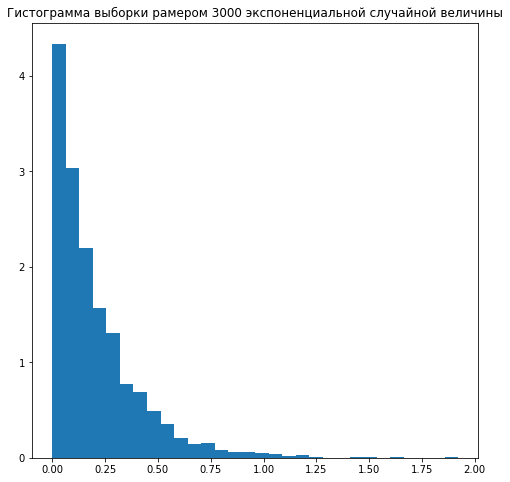

In [2]:
exp_rv = sts.expon(scale=1/5)
sample = exp_rv.rvs(3000)
plt.figure(figsize=(8, 8))
plt.hist(sample, bins = 30, density = True)
plt.title('Гистограмма выборки рамером 3000 экспоненциальной случайной величины')

In [3]:
def create_sample_mean(n_array):
    S_n = 0
    sample_mean = []
    for n in n_array:
        sample = exp_rv.rvs(1)
        S_n += sum(sample)
        sample_mean.append(S_n/n)
    return sample_mean

Попробуем проверить ЗБЧ на нескольких выборках и оценим скорость сходимости

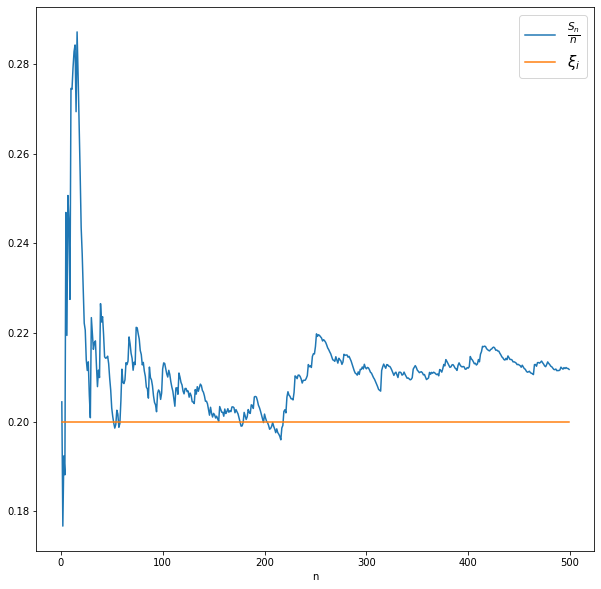

In [4]:
n_array = np.arange(1, 500)
sample_mean = create_sample_mean(n_array)
mean = [1/5]*len(n_array)
plt.figure(figsize=(10, 10))
plt.plot(n_array, sample_mean, label=r'$ \frac{S_n}{n} $')
plt.plot(n_array, mean, label=r'$\xi_i$')
plt.legend(prop={'size': 15})
plt.xlabel('n')
plt.show()

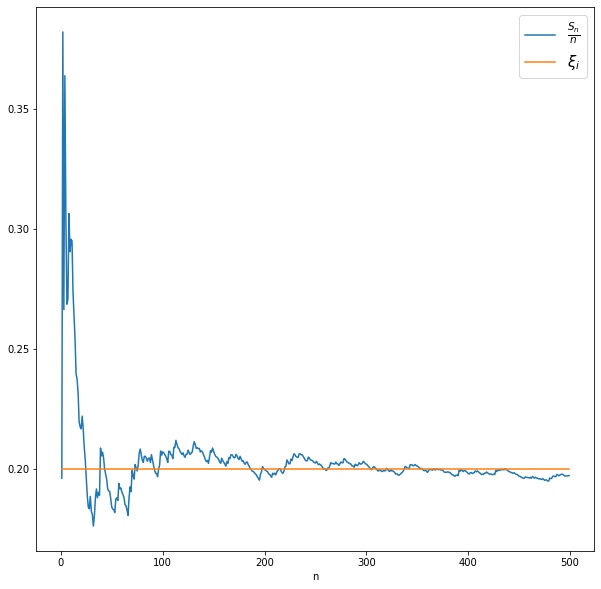

In [5]:
n_array = np.arange(1, 500)
sample_mean = create_sample_mean(n_array)
mean = [1/5]*len(n_array)
plt.figure(figsize=(10, 10))
plt.plot(n_array, sample_mean, label=r'$ \frac{S_n}{n} $')
plt.plot(n_array, mean, label=r'$\xi_i$')
plt.legend(prop={'size': 15})
plt.xlabel('n')
plt.show()

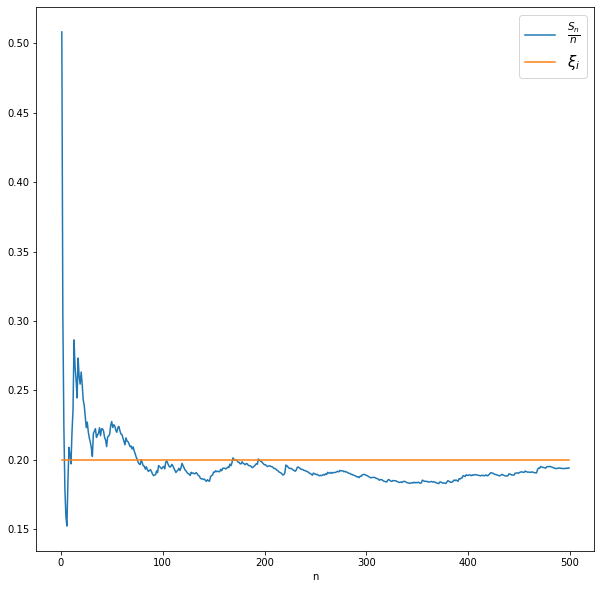

In [8]:
n_array = np.arange(1, 500)
sample_mean = create_sample_mean(n_array)
mean = [1/5]*len(n_array)
plt.figure(figsize=(10, 10))
plt.plot(n_array, sample_mean, label=r'$ \frac{S_n}{n} $')
plt.plot(n_array, mean, label=r'$\xi_i$')
plt.legend(prop={'size': 15})
plt.xlabel('n')
plt.show()

Видно, что примерно с 200го номера выборочное среднее все больше и больше приближается к прямой

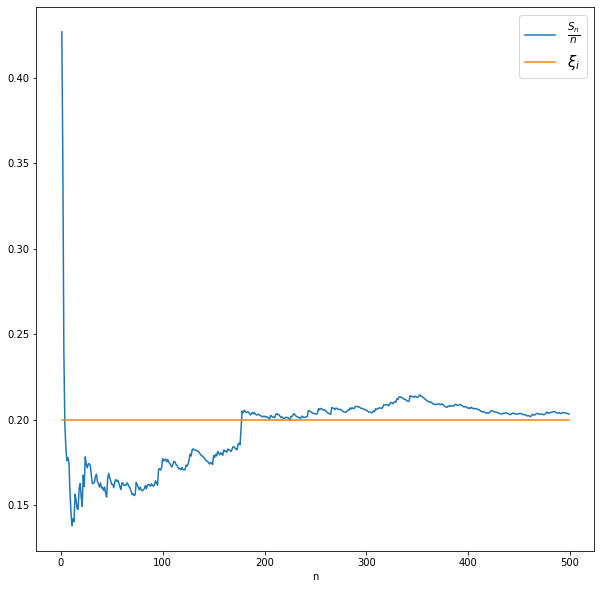

In [7]:
n_array = np.arange(1, 500)
sample_mean = create_sample_mean(n_array)
mean = [1/5]*len(n_array)
plt.figure(figsize=(10, 10))
plt.plot(n_array, sample_mean, label=r'$ \frac{S_n}{n} $')
plt.plot(n_array, mean, label=r'$\xi_i$')
plt.legend(prop={'size': 15})
plt.xlabel('n')
plt.show()

# Задание 2
Центральная предельная теорема:

$ \xi_i $ - независимые одинаково распределенные случайные величины, 

$ S_n = \sum_{i=1}^n \xi_i $

Тогда при условии существования математического ожидания и ненулевой дисперсии $\xi_i$ выполняется:

$ \frac{S_n - nE\xi_i}{\sqrt{nD\xi_i}} \Rightarrow N(0,1) $

Выборка объемом 5 :


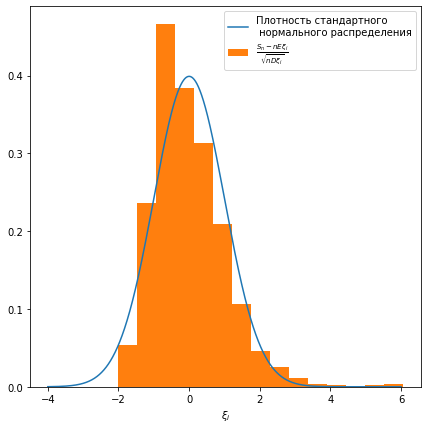

Выборка объемом 10 :


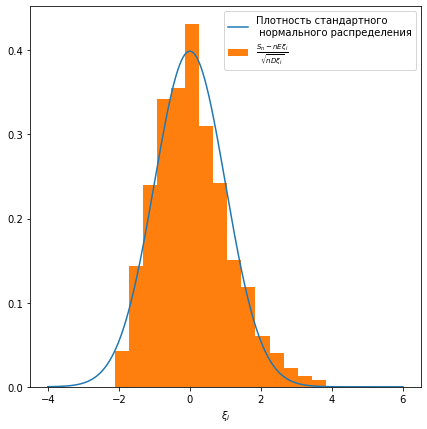

Выборка объемом 20 :


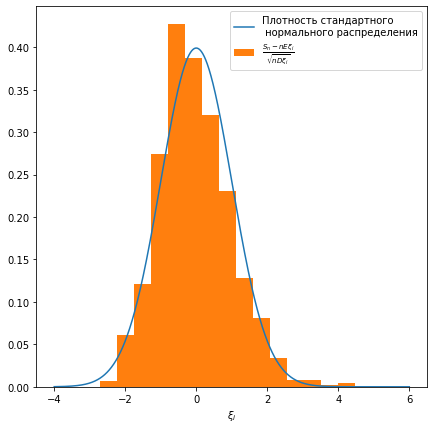

Выборка объемом 40 :


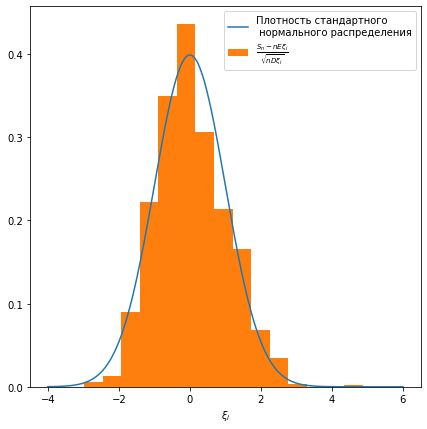

Выборка объемом 80 :


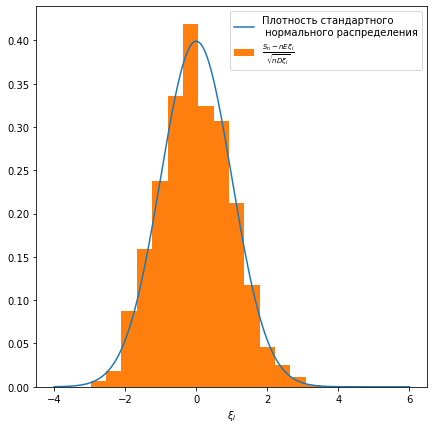

Выборка объемом 100 :


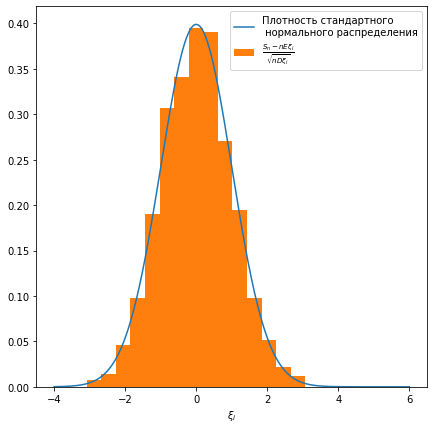

Выборка объемом 150 :


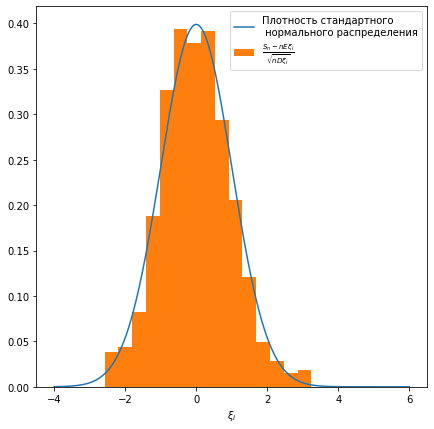

In [10]:
mean = 1/5
dispersion = 1/25
norm_rv = sts.norm()
x = np.linspace(-4,6,4000)
norm_pdf = norm_rv.pdf(x)

for n in (5, 10, 20, 40, 80, 100, 150):
    samples = []
    for i in range(1000):
        sample = exp_rv.rvs(n)
        samples.append((sum(sample) - n*mean)/math.sqrt(n*dispersion))
        
    print("Выборка объемом", n, ":")
    
    plt.figure(figsize=(7, 7))
    plt.xlabel(r'$\xi_i$')
    plt.plot(x, norm_pdf, label='Плотность стандартного \n нормального распределения')
    plt.hist(samples, bins = 15, density = True, label=r'$\frac{S_n - nE\xi_i}{\sqrt{nD\xi_i}}$')
    plt.legend()
    plt.show()

In [11]:
def empirical_distribution_function(samples, a, b):
    x = np.linspace(a, b, 50)
    answer = []
    n = len(samples)
    for i in x:
        count = 0
        for sample in samples:
            if sample >= i:
                break
            count += 1
        answer.append(float(count)/n)
    return x, answer

Посмотрим на разницу между эмпирической и исходной функцией распределения

Выборка объемом 5 :


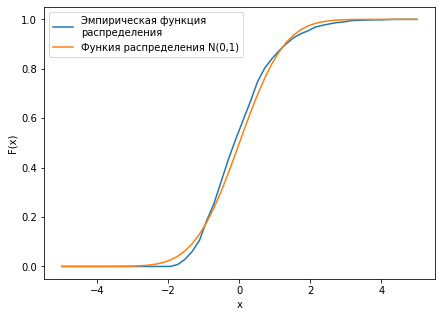

Выборка объемом 10 :


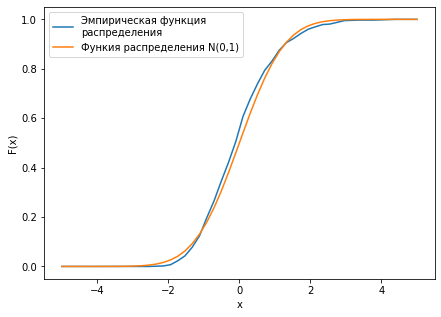

Выборка объемом 20 :


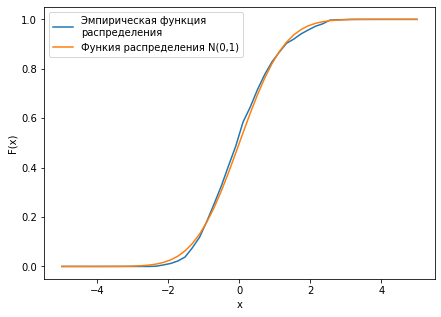

Выборка объемом 40 :


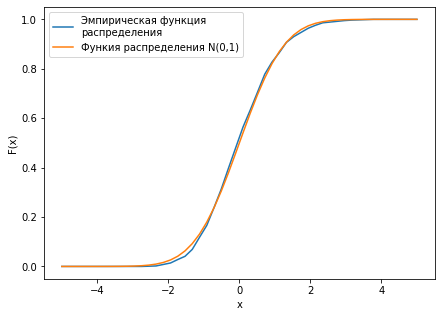

Выборка объемом 80 :


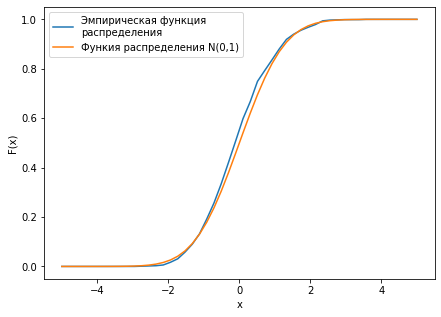

Выборка объемом 100 :


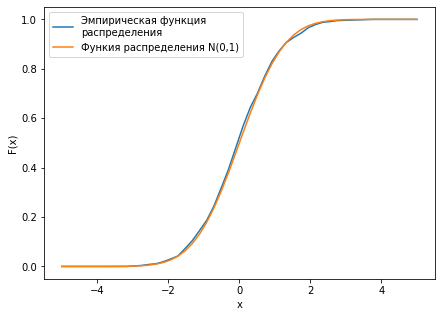

Выборка объемом 150 :


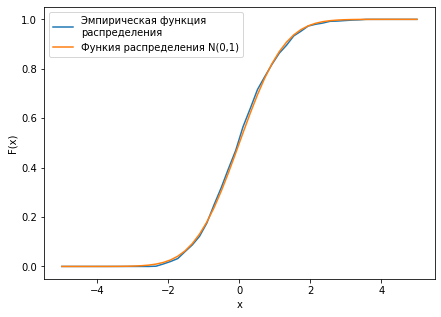

In [12]:
for n in (5, 10, 20, 40, 80, 100, 150):
    samples = []
    for i in range(1000):
        sample = exp_rv.rvs(n)
        samples.append((sum(sample) - n*mean)/math.sqrt(n*dispersion))
    samples.sort()
    x, y = empirical_distribution_function(samples, -5, 5)
    norm_cdf = [norm_rv.cdf(i) for i in x]
    
    print("Выборка объемом", n, ":")
    plt.figure(figsize=(7, 5))
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.plot(x, y, label='Эмпирическая функция\nраспределения')
    plt.plot(x, norm_cdf, label='Функия распределения N(0,1)')
    plt.legend()
    plt.show()

Теперь оценим разницу между функциями численно.

По критерию согласия Колмогорова

$ \sqrt n \sup_{t} |F*_n(t)-F(t)| \Rightarrow \eta $,

Где $\eta$ - случайная величина с распределением Колмогорова.
Построим зависимости среднего супремума разности от количества элементов в выборке

100%|██████████| 99/99 [02:10<00:00,  1.32s/it]


Text(0, 0.5, '$\\sup |F*_n(t)-F(t)|$')

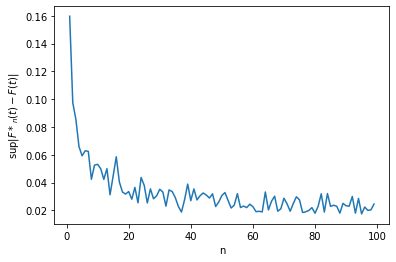

In [15]:
from tqdm import tqdm

y = []
for n in tqdm(range(1, 100)):
    samples = []
    ktest = []
    for _ in range(100):
        for _ in range(100):
            sample = exp_rv.rvs(n)
            samples.append((sum(sample) - n*mean)/math.sqrt(n*dispersion))
        ktest.append(scipy.stats.kstest(samples, 'norm')[0])
    y.append(sum(ktest)/100)

x = np.arange(1, 100)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel(r'$\sup |F*_n(t)-F(t)|$')

К сожалению, оценить сходимоть этой зависимости именно к распределению Колмогорова мы не сможем, но мы можем проверить скорость сходимости: она должна быть $\frac{1}{\sqrt n}$

Text(0.5, 0, 'n')

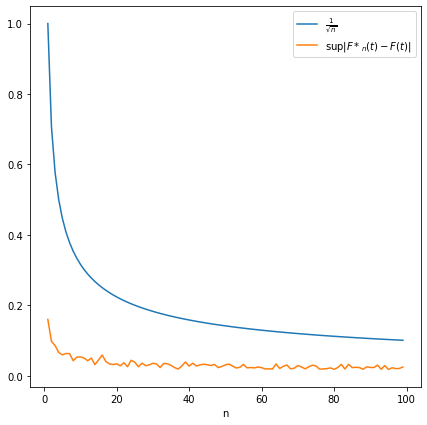

In [19]:
sqrt = [1/math.sqrt(i) for i in x]
plt.figure(figsize=(7, 7))
plt.plot(x, sqrt, label=r'$\frac{1}{\sqrt{n}}$')
plt.plot(x, y, label=r'$\sup |F*_n(t)-F(t)|$')
plt.legend()
plt.xlabel('n')

# Задание 3
Пуассоновский процесс:

Пусть диспетчеру поступают звонки согласно Пуассоновскому процессу с интенсивностью $\lambda$ звонков в час. В три часа дня диспетчер делаетперерыв на чай в течении получаса. В этот промежуток времени поступил ровно один звонок. Сколько в среднем пройдет времени между этим "неудачным" звонком и последующим?

Построим график среднего времени ожидания в зависимости от $\lambda$ и сравним его с графиком функции 
$f(\lambda) = \frac{1}{4} + \frac{1}{\lambda}$

In [20]:
def Poisson_process(parameter, count):
    values = []
    while len(values) < count:
        exp_v = random.expovariate(lambd = parameter)
        if exp_v < 0.5:
            exp_v2 = random.expovariate(lambd = parameter)
            while exp_v + exp_v2 <= 0.5:
                exp_v2 = random.expovariate(lambd = parameter)
            values.append(exp_v2)
    return values

Размер выборки: 100


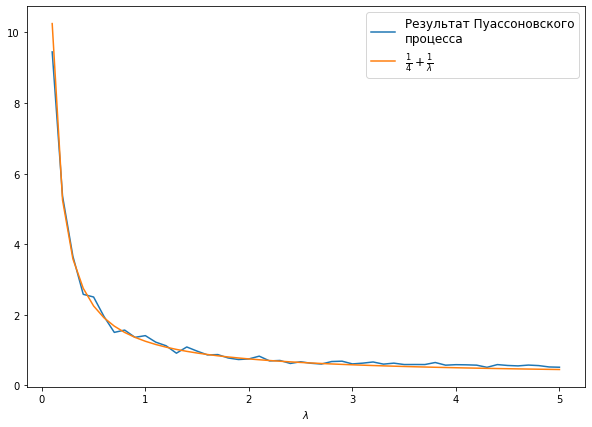

In [21]:
x = np.linspace(0.1, 5, 50)
y = []
for i in x:
    y.append(sum(Poisson_process(i, 100))/100)
    
print('Размер выборки: 100')
plt.figure(figsize=(10, 7))    
y_correct = np.array([1/4 + 1/i for i in x])
plt.xlabel(r'$\lambda$')
plt.plot(x, np.array(y), label='Результат Пуассоновского\nпроцесса') 
plt.plot(x, y_correct, label=r'$\frac{1}{4}+\frac{1}{\lambda}$')
plt.legend(prop={'size': 12})

Посмотрим еще на нескольких размерах выборок

Размер выборки: 50


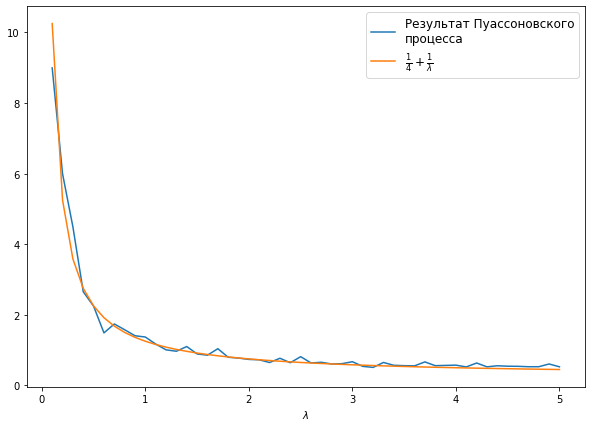

In [22]:
x = np.linspace(0.1, 5, 50)
y = []
for i in x:
    y.append(sum(Poisson_process(i, 50))/50)
    
print('Размер выборки: 50')
plt.figure(figsize=(10, 7))    
y_correct = np.array([1/4 + 1/i for i in x])
plt.xlabel(r'$\lambda$')
plt.plot(x, np.array(y), label='Результат Пуассоновского\nпроцесса') 
plt.plot(x, y_correct, label=r'$\frac{1}{4}+\frac{1}{\lambda}$')
plt.legend(prop={'size': 12})

Размер выборки: 20


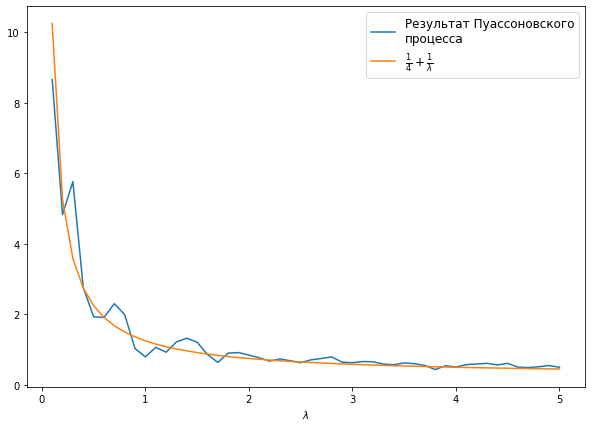

In [23]:
x = np.linspace(0.1, 5, 50)
y = []
for i in x:
    y.append(sum(Poisson_process(i, 20))/20)
    
print('Размер выборки: 20')
plt.figure(figsize=(10, 7))    
y_correct = np.array([1/4 + 1/i for i in x])
plt.xlabel(r'$\lambda$')
plt.plot(x, np.array(y), label='Результат Пуассоновского\nпроцесса') 
plt.plot(x, y_correct, label=r'$\frac{1}{4}+\frac{1}{\lambda}$')
plt.legend(prop={'size': 12})

Размер выборки: 200


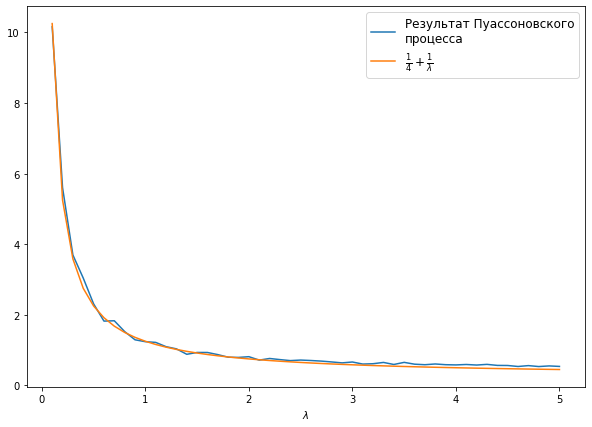

In [24]:
x = np.linspace(0.1, 5, 50)
y = []
for i in x:
    y.append(sum(Poisson_process(i, 200))/200)
    
print('Размер выборки: 200')
plt.figure(figsize=(10, 7))    
y_correct = np.array([1/4 + 1/i for i in x])
plt.xlabel(r'$\lambda$')
plt.plot(x, np.array(y), label='Результат Пуассоновского\nпроцесса') 
plt.plot(x, y_correct, label=r'$\frac{1}{4}+\frac{1}{\lambda}$')
plt.legend(prop={'size': 12})